In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 주피터 노트북 경로설정
os.chdir('../')

# 포인트클라우드 picle데이터 경로
file_dir = "data/etri3Dobj_infra_edge/db_meta_withoutvelo.pkl"

In [2]:
with open(file_dir, "rb") as f:
    data = pickle.load(f)
data_pedetrian = data["pedestrian"]

In [3]:
xloc = []
yloc = []
zloc = []
pnt_num = []
pnt_varx = []
pnt_vary = []
pnt_varz = []
cnt = 0
for i in range(len(data_pedetrian)):
    pnts = np.fromfile(data_pedetrian[i]['path'], dtype = np.float32).reshape(-1, 3)
    if (pnts.shape[0] == 0):
        continue
    vars = np.divide(np.sum(np.power(pnts, 2), axis=0), pnts.shape[0])
    cnt += 1
    box = data_pedetrian[i]['box3d_lidar']
    
    xloc.append(box[0])
    yloc.append(box[1])
    zloc.append(box[2])
    
    pnt_num.append(pnts.shape[0])
    
    # pnt_varx.append(vars[0])
    # pnt_vary.append(vars[1])
    # pnt_varz.append(vars[2])

In [6]:
dist_sum = 0
xloc_sum = 0
yloc_sum = 0
zloc_sum = 0

dist = np.sqrt(np.power(np.array(xloc), 2) + np.power(np.array(yloc), 2) + np.power(np.array(zloc), 2))
dist_sum = np.sum(dist)
dist_avg =  dist_sum/cnt
dist_std = np.sqrt(np.sum(np.power(dist- dist_avg, 2))/cnt)

x_avg = np.sum(np.array(xloc)/cnt)
y_avg = np.sum(np.array(yloc)/cnt)
z_avg = np.sum(np.array(zloc)/cnt)

x_std = np.sqrt(np.sum(np.power(np.array(xloc) - x_avg, 2))/cnt)
y_std = np.sqrt(np.sum(np.power(np.array(yloc) - y_avg, 2))/cnt)
z_std = np.sqrt(np.sum(np.power(np.array(zloc) - z_avg, 2))/cnt)

pnt_num_avg = np.sum(np.array(pnt_num)) / cnt
pnt_num_std = np.sqrt(np.sum(np.power(np.array(pnt_num) - pnt_num_avg, 2))/cnt)



In [12]:
pnt_num.sort()
median_idx = len(pnt_num) / 2
pnt_num[int(median_idx)]

31

포인트 개수 평균: 187.20634281951862
포인트 개수 표준편차: 237.57716190310123


Text(0.5, 1.0, 'Histogram of point nums')

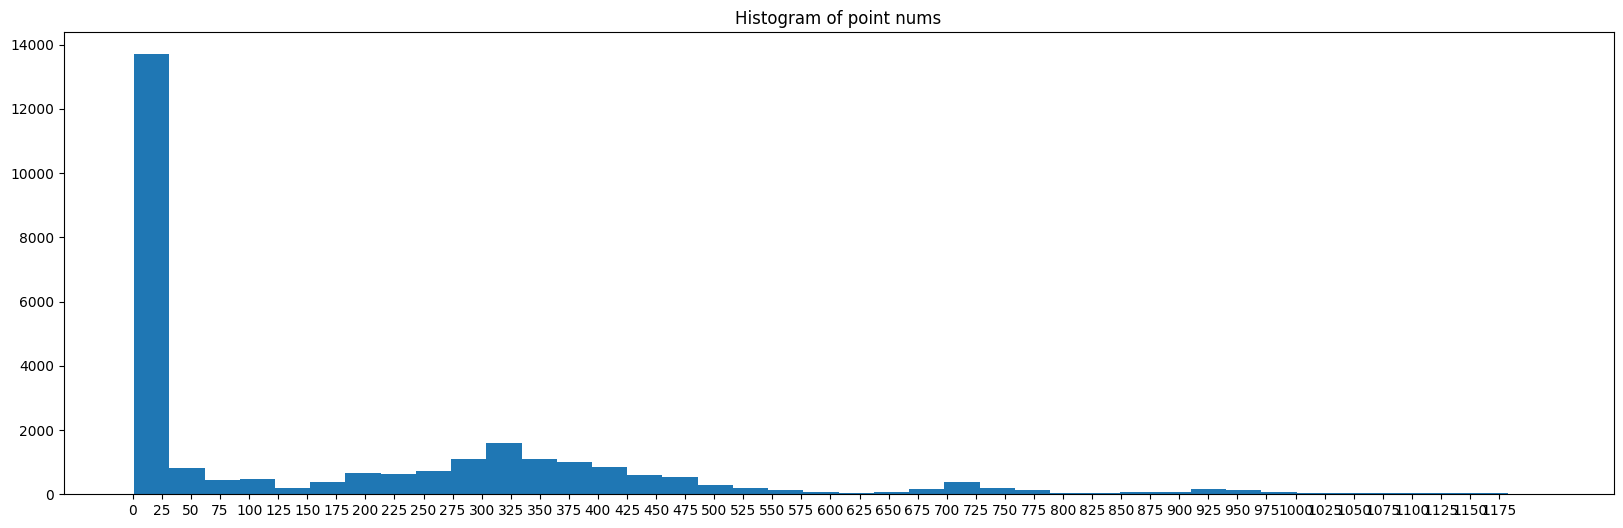

In [63]:
# 포인트 개수
counts, bins = np.histogram(pnt_num, bins=40)
print(f"포인트 개수 평균: {pnt_num_avg}")
print(f"포인트 개수 표준편차: {pnt_num_std}")
plt.figure(figsize=(20, 6))
plt.hist(bins[:-1], bins, weights=counts)
plt.xticks(np.arange(0, 1200, 25))
plt.title('Histogram of point nums')

포인트 개수 평균: 10.96808362369338
포인트 개수 표준편차: 9.288272859030814


Text(0.5, 1.0, 'Histogram of point nums less than 50')

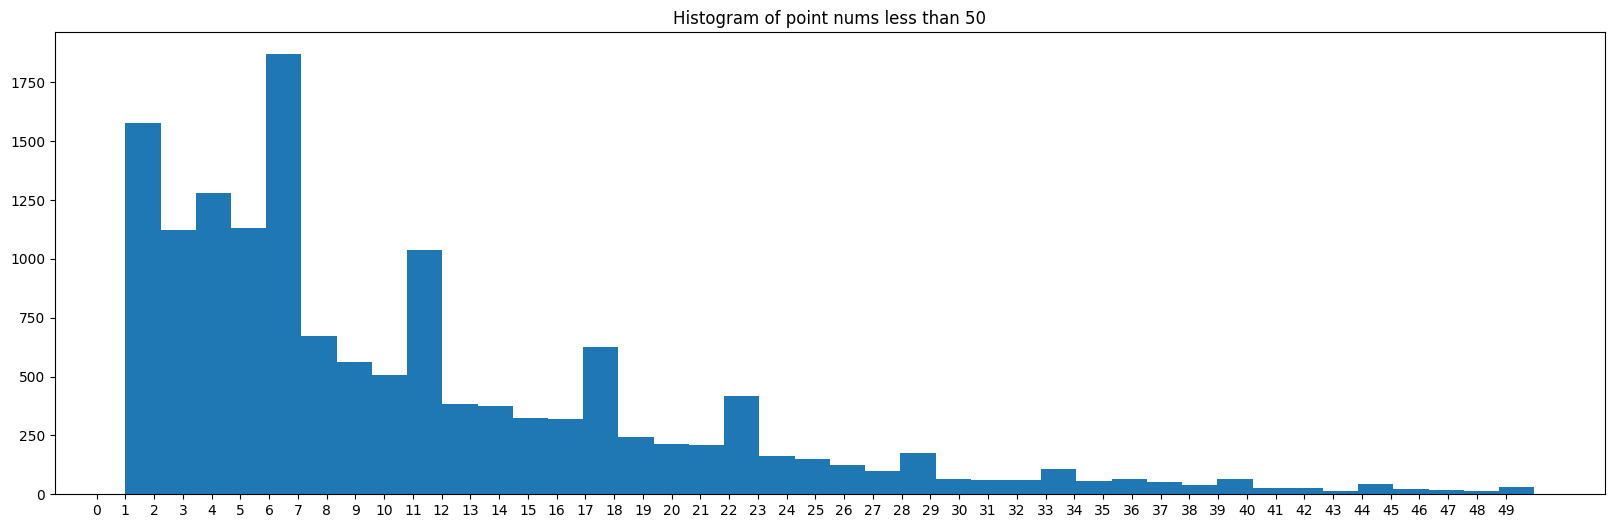

In [66]:
# 포인트 50개 이하
pnt_less50_bool = np.where(np.array(pnt_num)<=50)
pnt_less50 = np.array(pnt_num)[pnt_less50_bool]
counts, bins = np.histogram(pnt_less50, bins=40)
print(f"포인트 개수 평균: {np.average(pnt_less50)}")
print(f"포인트 개수 표준편차: {np.std(pnt_less50)}")
plt.figure(figsize=(20, 6))
plt.hist(bins[:-1], bins, weights=counts)
plt.xticks(np.arange(0, 50, 1))
plt.title('Histogram of point nums less than 50')

거리 평균: 18.78345034948943
거리 표준편차: 16.058576974061676


Text(0.5, 1.0, 'Histogram of Distance')

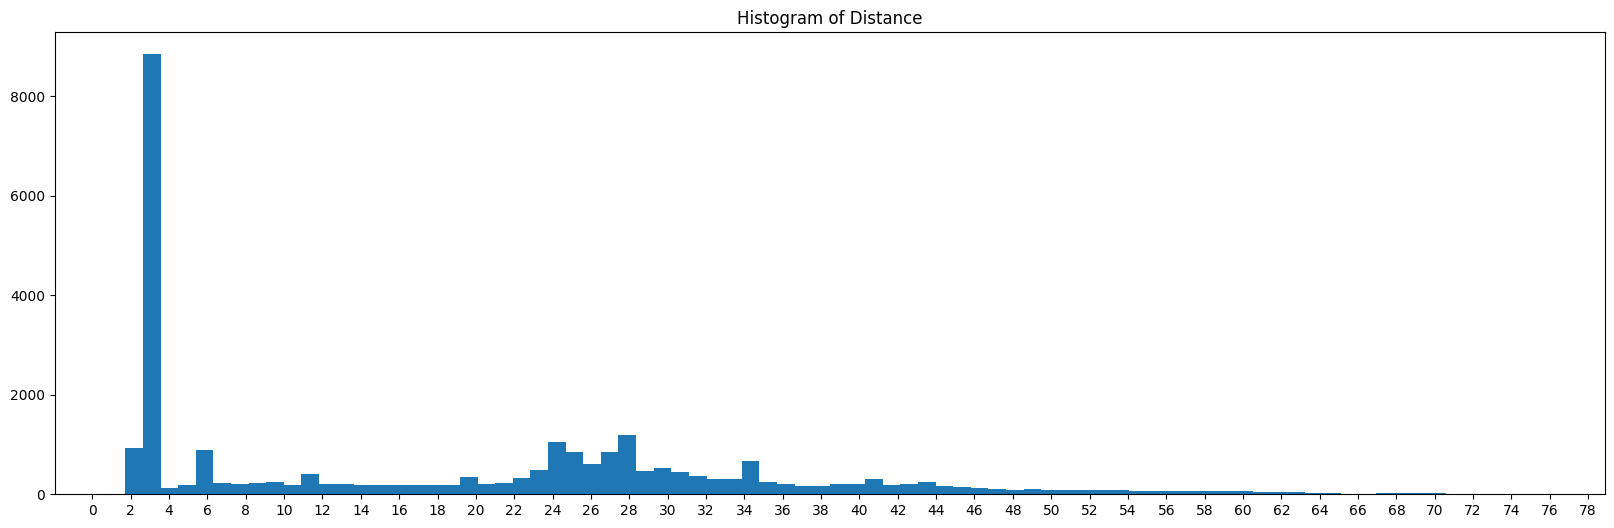

In [68]:
# 중심점 거리
counts, bins = np.histogram(dist, bins=80)
print(f"거리 평균: {dist_avg}")
print(f"거리 표준편차: {dist_std}")
plt.figure(figsize=(20, 6))
plt.hist(bins[:-1], bins, weights=counts)
plt.xticks(np.arange(0, 80, 2))
plt.title('Histogram of Distance')

x좌표 평균: -2.4526948340098014
x좌표 표준편차: 20.733714466411534


Text(0.5, 1.0, 'Histogram of X Location')

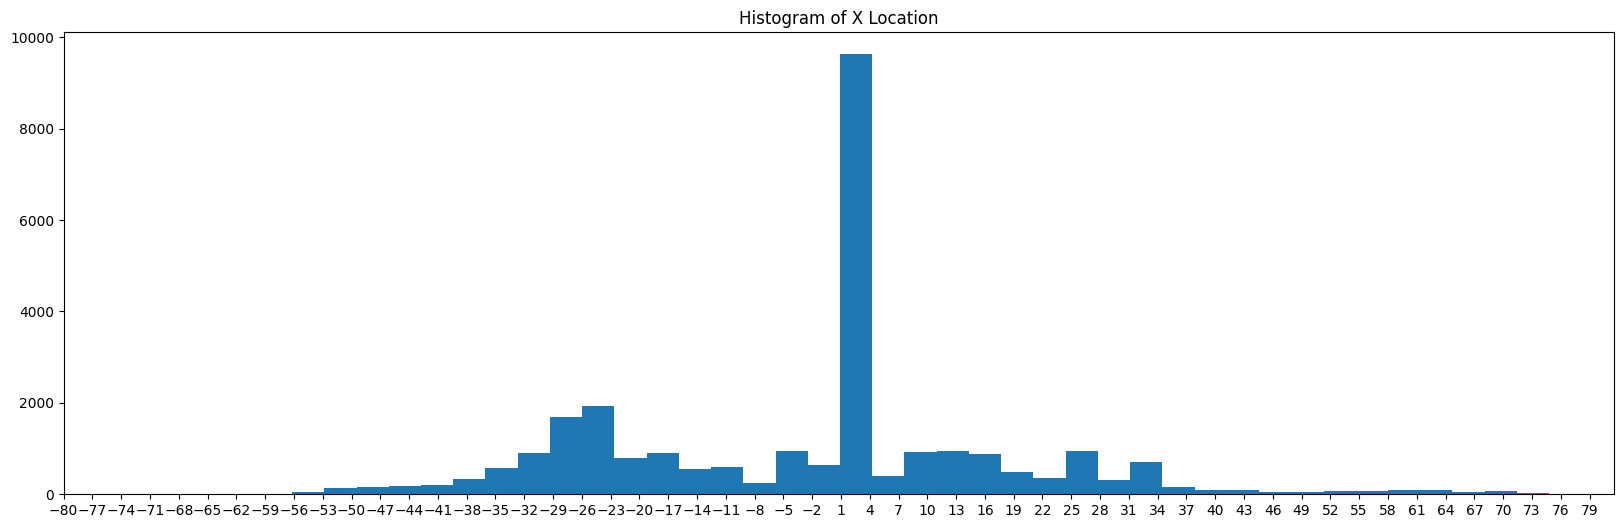

In [52]:
# x좌표
counts, bins = np.histogram(xloc, bins=40)
print(f"x좌표 평균: {x_avg}")
print(f"x좌표 표준편차: {x_std}")
plt.figure(figsize=(20, 6))
plt.hist(bins[:-1], bins, weights=counts)
plt.xticks(np.arange(-80, 80, 3))
plt.title('Histogram of X Location')

y좌표 평균: -2.806173012870538
y좌표 표준편차: 12.89505651447265


Text(0.5, 1.0, 'Histogram of Y Location')

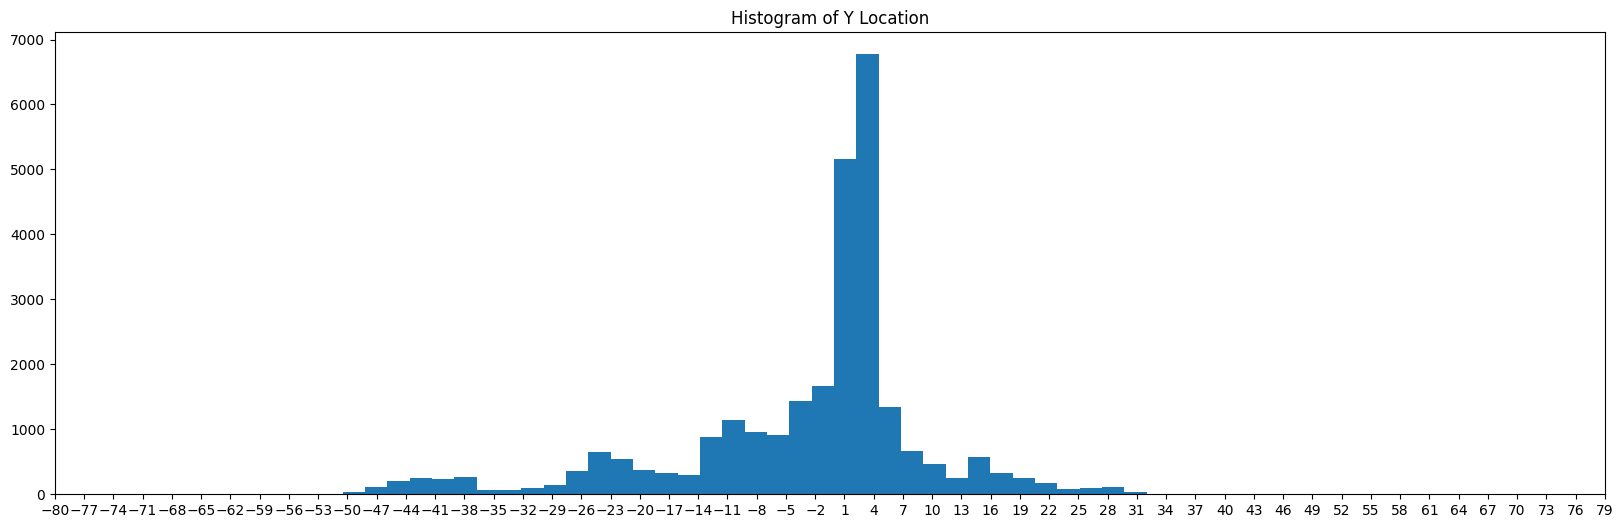

In [53]:
# y좌표
counts, bins = np.histogram(yloc, bins=40)
print(f"y좌표 평균: {y_avg}")
print(f"y좌표 표준편차: {y_std}")
plt.figure(figsize=(20, 6))
plt.hist(bins[:-1], bins, weights=counts)
plt.xticks(np.arange(-80, 80, 3))
plt.title('Histogram of Y Location')

z좌표 평균: -0.6015441484471399
z좌표 표준편차: 0.5237643439560568


Text(0.5, 1.0, 'Histogram of Z Location')

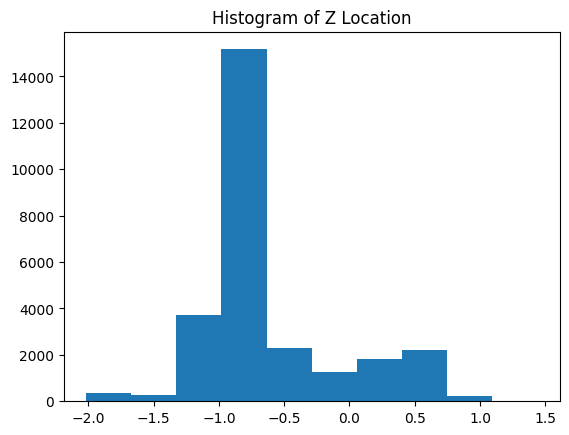

In [30]:
# z좌표
counts, bins = np.histogram(zloc)
print(f"z좌표 평균: {z_avg}")
print(f"z좌표 표준편차: {z_std}")
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Histogram of Z Location')